                 time  temperature  humidity
0 2023-01-01 00:00:00          7.4        97
1 2023-01-01 01:00:00          7.7        96
2 2023-01-01 02:00:00          7.7        96
3 2023-01-01 03:00:00          9.1        93
4 2023-01-01 04:00:00         11.5        87
Mean Squared Error: 30.38628775413547


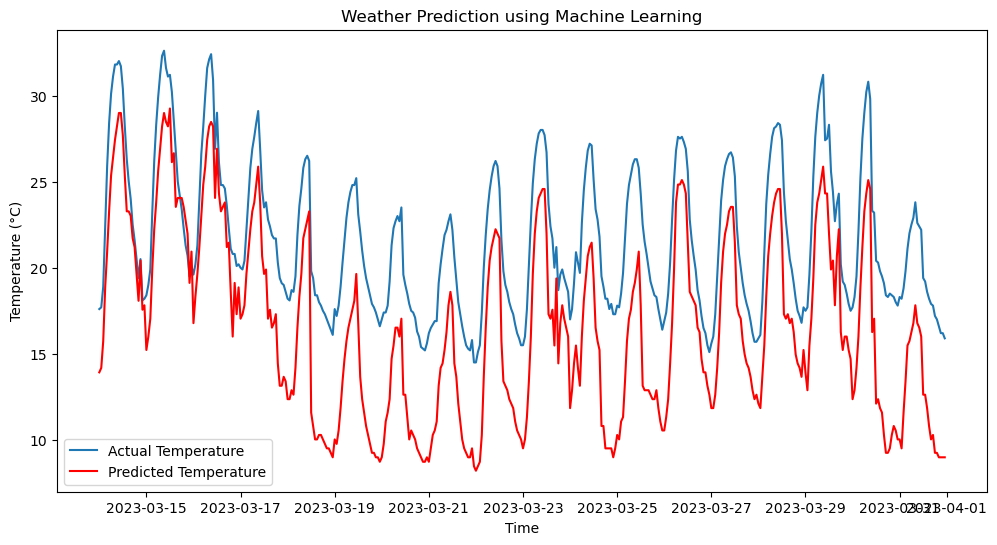

In [1]:
# Weather Prediction using Machine Learning (No CSV Required)

# !pip install requests scikit-learn matplotlib pandas

import requests
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# -------------------------
# 1. Fetch Weather Data (Open-Meteo API)
# -------------------------
# Example: New Delhi coordinates (28.6139° N, 77.2090° E)
latitude = 28.6139
longitude = 77.2090

url = f"https://archive-api.open-meteo.com/v1/archive?latitude={latitude}&longitude={longitude}&start_date=2023-01-01&end_date=2023-03-31&hourly=temperature_2m,relative_humidity_2m"

response = requests.get(url)
data = response.json()

# Convert to DataFrame
df = pd.DataFrame({
    "time": data["hourly"]["time"],
    "temperature": data["hourly"]["temperature_2m"],
    "humidity": data["hourly"]["relative_humidity_2m"]
})

# Convert time to datetime
df["time"] = pd.to_datetime(df["time"])
print(df.head())

# -------------------------
# 2. Prepare Data
# -------------------------
X = df[["humidity"]]        # feature
y = df["temperature"]       # target

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# -------------------------
# 3. Train Model
# -------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# -------------------------
# 4. Predictions
# -------------------------
y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# -------------------------
# 5. Visualization
# -------------------------
plt.figure(figsize=(12,6))
plt.plot(df["time"].iloc[-len(y_test):], y_test, label="Actual Temperature")
plt.plot(df["time"].iloc[-len(y_test):], y_pred, label="Predicted Temperature", color="red")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.title("Weather Prediction using Machine Learning")
plt.legend()
plt.show()
